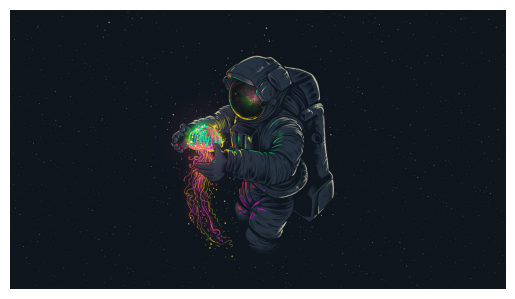

In [1]:
#Image Reading
import cv2
from google.colab import files
from matplotlib import pyplot as plt
image = cv2.imread('/content/backiee-128652-landscape.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

In [2]:
#Image Properties
print("Image Properties:")
print(f"Shape (Height, Width): {image.shape}")
print(f"Size (Total Pixels): {image.size}")
print(f"Data Type: {image.dtype}")

Image Properties:
Shape (Height, Width): (2160, 3840, 3)
Size (Total Pixels): 24883200
Data Type: uint8


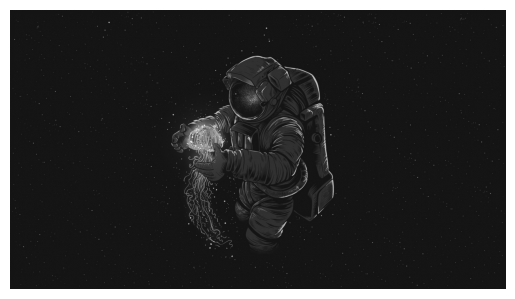

In [3]:
#GrayScale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')
plt.axis('off')
plt.show()

Text(0, 0.5, 'Number of Pixels')

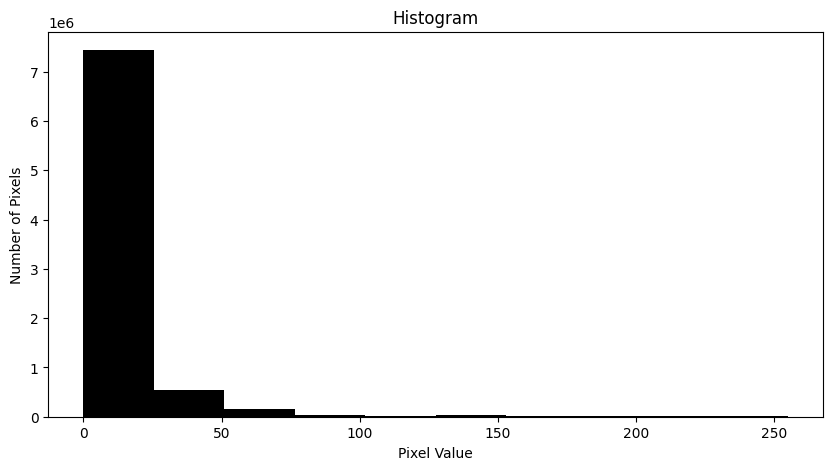

In [7]:
#Histogram
plt.figure(figsize=(10, 5))
plt.hist(gray_image.ravel(), color='black')
plt.title('Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Number of Pixels')

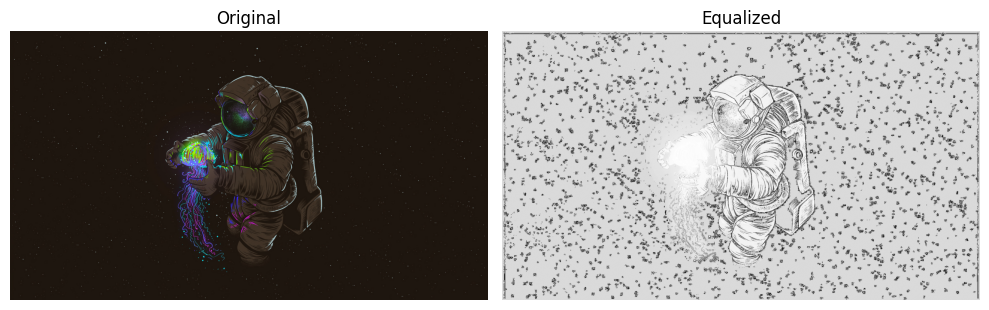

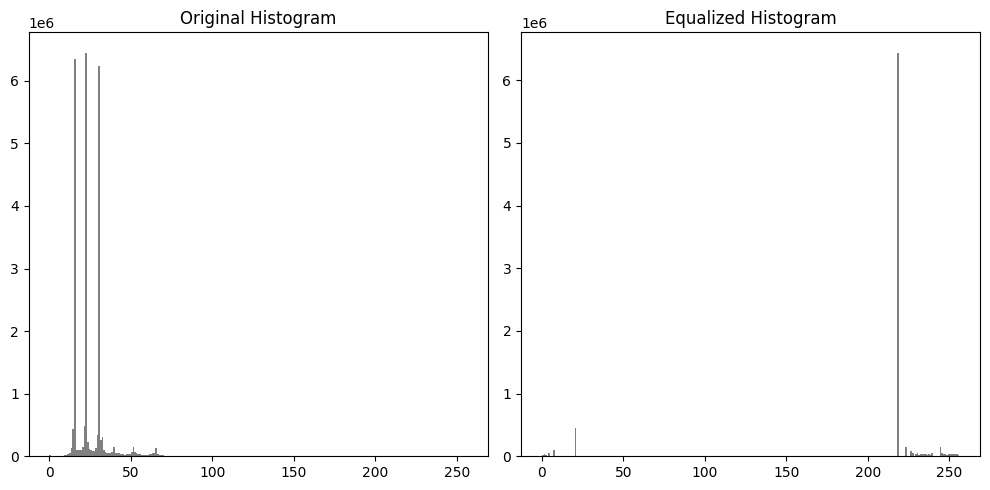

In [8]:
#Histogram Equalis
equalized_image = cv2.equalizeHist(gray_image)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized')
plt.axis('off')
plt.tight_layout()
plt.show()
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(image.ravel(), bins=256, range=(0, 256), color='gray')
plt.title('Original Histogram')
plt.subplot(1, 2, 2)
plt.hist(equalized_image.ravel(), bins=256, range=(0, 256), color='gray')
plt.title('Equalized Histogram')
plt.tight_layout()
plt.show()

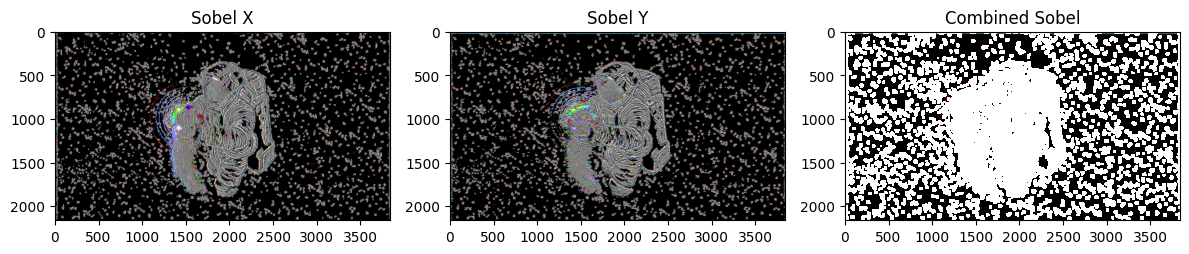

In [10]:
#EDGE (Sobel)
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)
sobel_combined = cv2.bitwise_or(sobel_x, sobel_y)
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(sobel_x, cmap='gray')
plt.title('Sobel X')
plt.subplot(1, 3, 2)
plt.imshow(sobel_y, cmap='gray')
plt.title('Sobel Y')
plt.subplot(1, 3, 3)
plt.imshow(sobel_combined, cmap='gray')
plt.title('Combined Sobel')
plt.tight_layout()
plt.show()

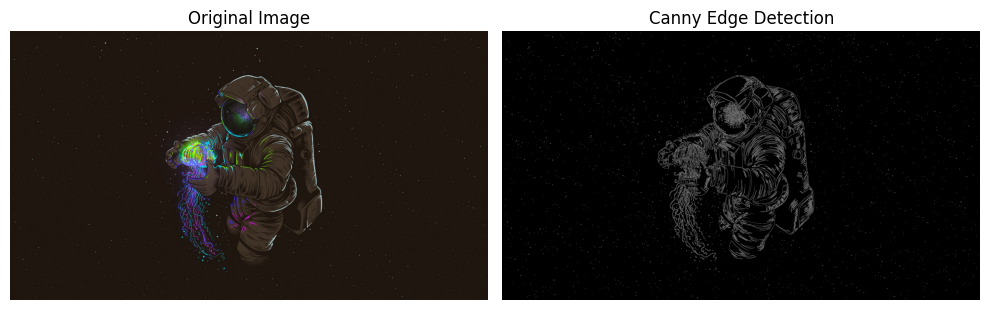

In [11]:
#EDGE (Canny)
edges = cv2.Canny(image, threshold1=100, threshold2=200)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')
plt.tight_layout()
plt.show()

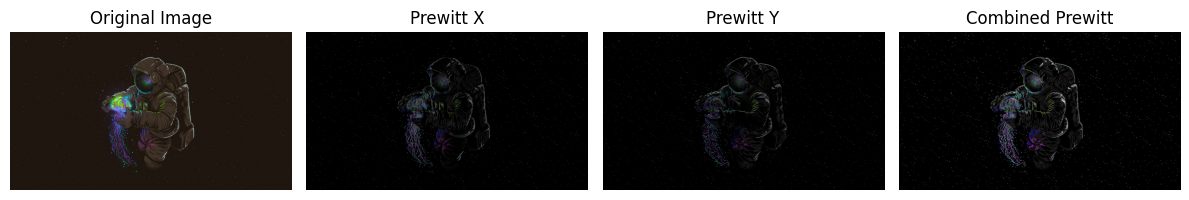

In [12]:
#EDGE (Prewitt)
import numpy as np
kernel_prewitt_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
kernel_prewitt_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])
prewitt_x = cv2.filter2D(image, -1, kernel_prewitt_x)
prewitt_y = cv2.filter2D(image, -1, kernel_prewitt_y)
prewitt_combined = cv2.bitwise_or(prewitt_x, prewitt_y)
plt.figure(figsize=(12, 6))
plt.subplot(1, 4, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 4, 2)
plt.imshow(prewitt_x, cmap='gray')
plt.title('Prewitt X')
plt.axis('off')
plt.subplot(1, 4, 3)
plt.imshow(prewitt_y, cmap='gray')
plt.title('Prewitt Y')
plt.axis('off')
plt.subplot(1, 4, 4)
plt.imshow(prewitt_combined, cmap='gray')
plt.title('Combined Prewitt')
plt.axis('off')
plt.tight_layout()
plt.show()

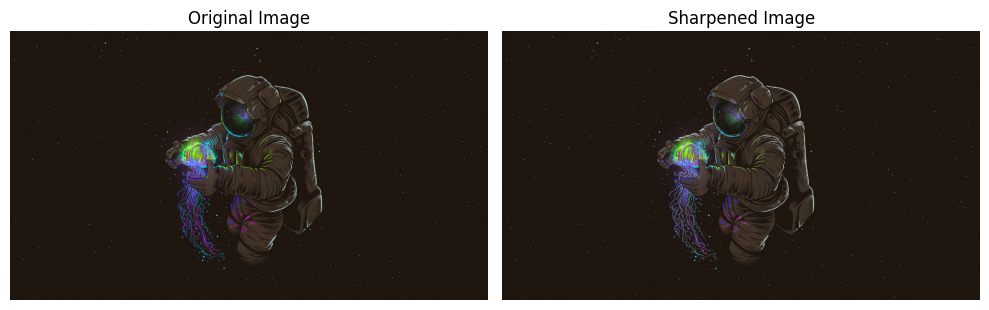

In [13]:
#Image Sharpening
sharpening_kernel = np.array([
[0, -1, 0],
[-1, 5, -1],
[0, -1, 0]
])
sharpened_image = cv2.filter2D(image, -1, sharpening_kernel)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(sharpened_image, cmap='gray')
plt.title('Sharpened Image')
plt.axis('off')
plt.tight_layout()
plt.show()

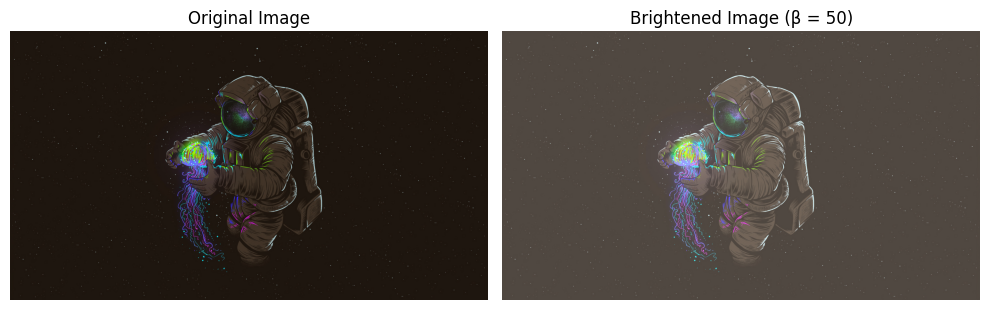

In [14]:
#Image Brightness
brightness = 50
bright_image = cv2.convertScaleAbs(image, alpha=1, beta=brightness)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(bright_image, cmap='gray')
plt.title(f'Brightened Image (β = {brightness})')
plt.axis('off')
plt.tight_layout()
plt.show()

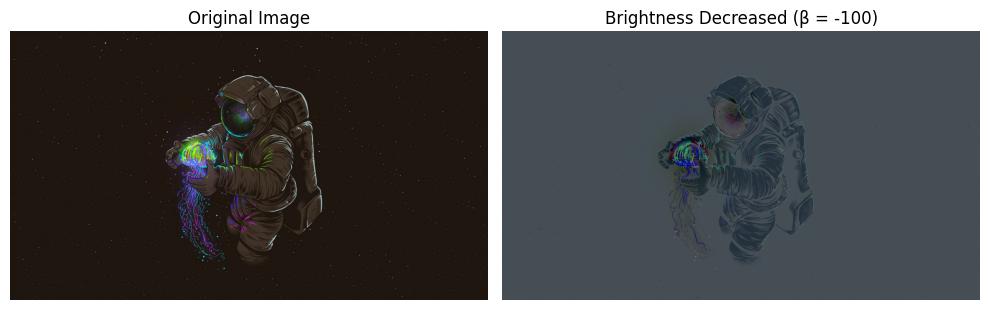

In [21]:
#Image Brightness (LOW)
brightness = -100
bright_image = cv2.convertScaleAbs(image, alpha=1, beta=brightness)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(bright_image, cmap='gray')
plt.title(f'Brightness Decreased (β = {brightness})')
plt.axis('off')
plt.tight_layout()
plt.show()

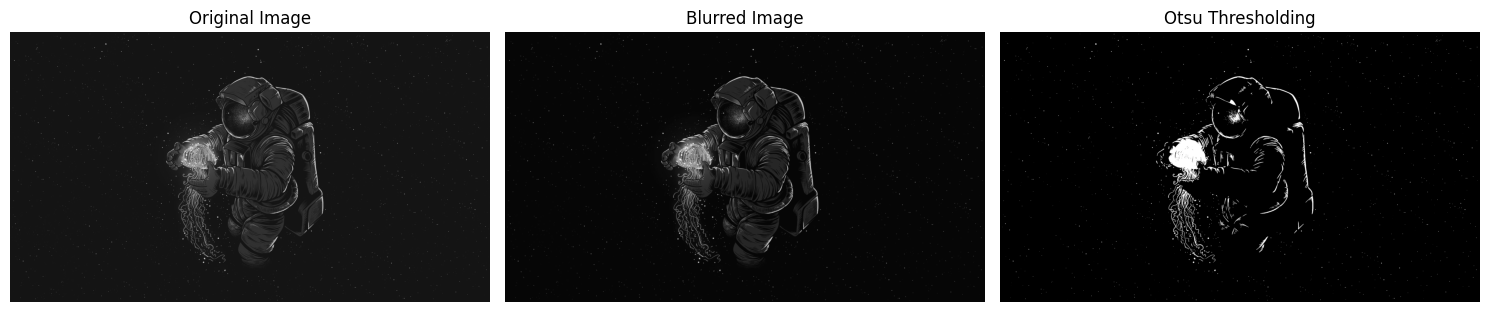

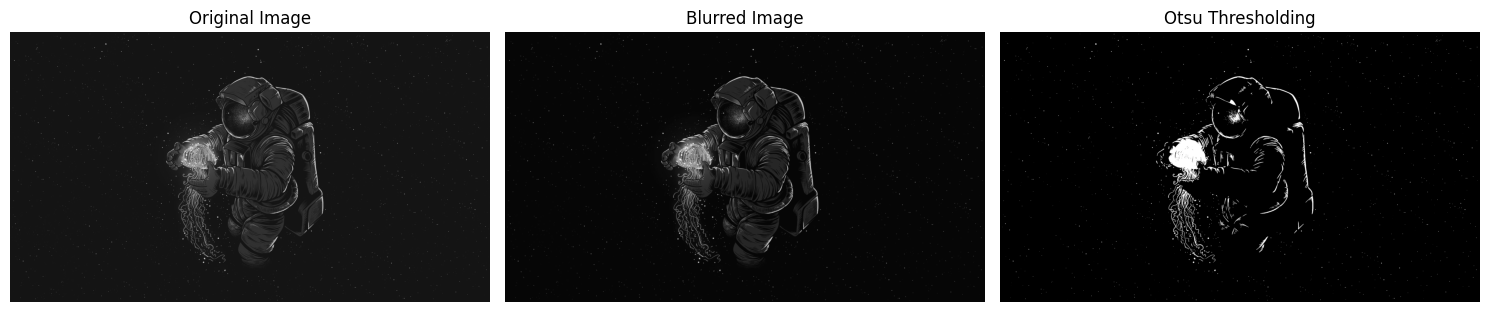

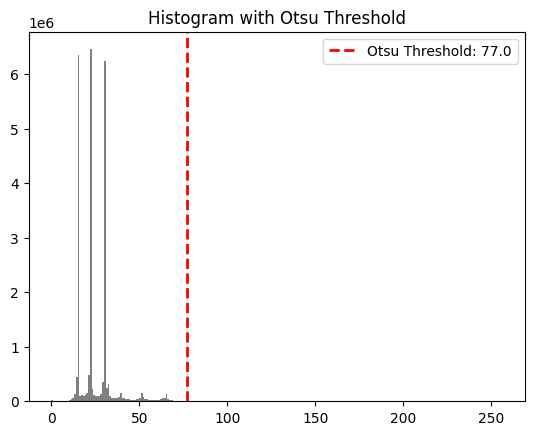

<ipython-input-24-040a54c86cd7>:42: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


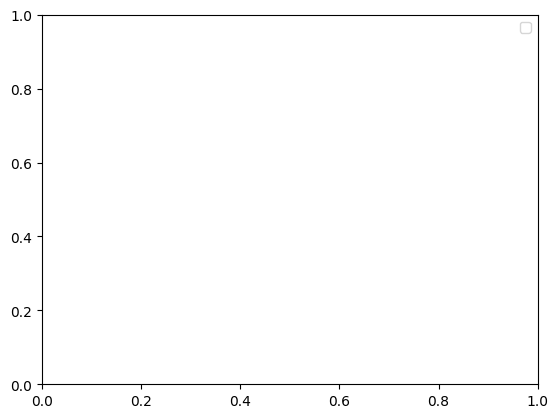

In [24]:
#OTSU
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)
_, otsu_threshold = cv2.threshold(blurred_image, 0, 255, cv2.THRESH_BINARY
+ cv2.THRESH_OTSU)
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(blurred_image, cmap='gray')
plt.title('Blurred Image')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(otsu_threshold, cmap='gray')
plt.title('Otsu Thresholding')
plt.axis('off')
plt.tight_layout()
#OTSU
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)
_, otsu_threshold = cv2.threshold(blurred_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(blurred_image, cmap='gray')
plt.title('Blurred Image')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(otsu_threshold, cmap='gray')
plt.title('Otsu Thresholding')
plt.axis('off')
plt.tight_layout()
plt.show()
plt.hist(image.ravel(), bins=256, range=(0, 256), color='gray')
plt.axvline(_, color='red', linestyle='dashed', linewidth=2, label=f'Otsu Threshold: {_}')
plt.title('Histogram with Otsu Threshold')
plt.legend()
plt.show()
plt.legend()
plt.show()

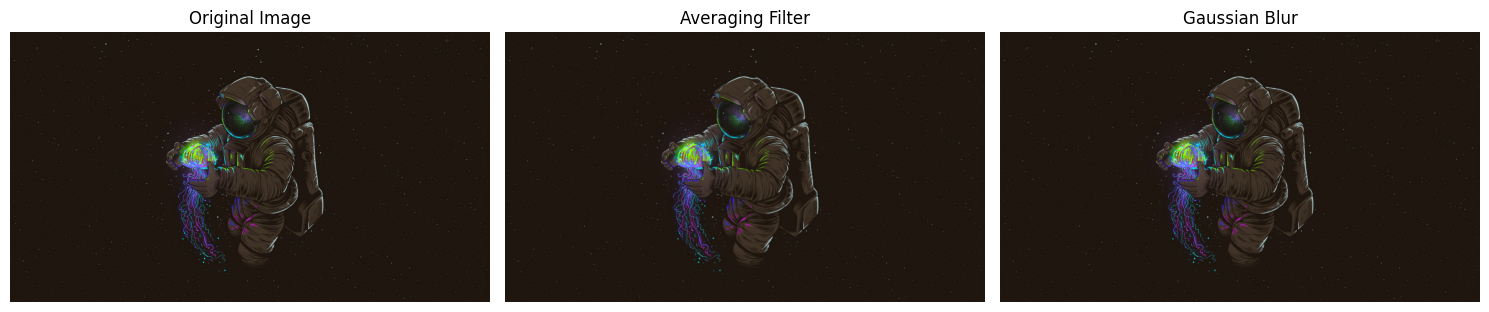

In [25]:
#Low Pass
b_image = cv2.imread('/content/backiee-128652-landscape.jpg')
average_blur = cv2.blur(b_image, (5, 5))
gaussian_blur = cv2.GaussianBlur(b_image, (5, 5), 0)
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(b_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(average_blur, cmap='gray')
plt.title('Averaging Filter')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(gaussian_blur, cmap='gray')
plt.title('Gaussian Blur')
plt.axis('off')
plt.tight_layout()
plt.show()

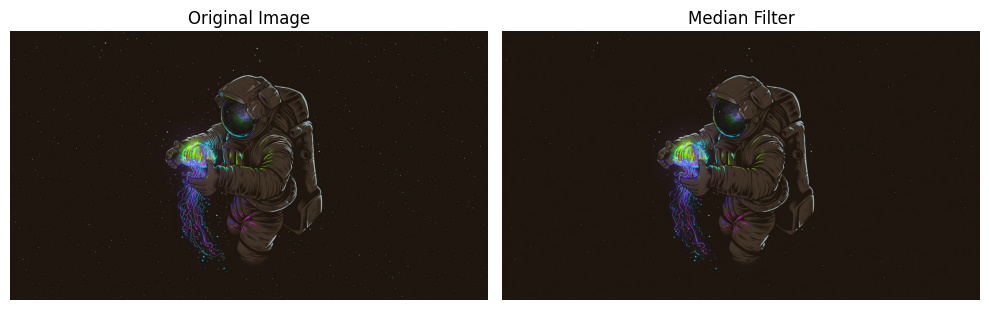

In [26]:
#Median
median_blur = cv2.medianBlur(b_image, 5)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(b_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(median_blur, cmap='gray')
plt.title('Median Filter')
plt.axis('off')
plt.tight_layout()
plt.show()